In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
csv_path = os.path.join("..", "..", "data","LINKED_DATA", "TSR_ALL", "TSR_ALL.csv")
tsr_all = pd.read_csv(csv_path)
tsr_all.head()

,icase_id,idcase_id,feeding,transfers,bathing,toilet_use,grooming,mobility,stairs,dressing,...,nihs_4_out,nihs_5al_out,nihs_5br_out,nihs_6al_out,nihs_6br_out,nihs_7_out,nihs_8_out,nihs_9_out,nihs_10_out,nihs_11_out
0,9067,005-00009067-1,5.0,10.0,0.0,5.0,0.0,10.0,5.0,5.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,9114,010-00009114-1,10.0,15.0,5.0,10.0,5.0,15.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9115,010-00009115-1,10.0,15.0,5.0,10.0,5.0,15.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9121,010-00009121-1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0
4,9123,010-00009123-1,10.0,15.0,5.0,10.0,5.0,15.0,10.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
barthel = ["feeding", "transfers", "bathing", "toilet_use", "grooming", "mobility", "stairs", "dressing", 
           "bowel_control", "bladder_control"]
nihss_out = ["nihs_1a_out", "nihs_1b_out", "nihs_1c_out", "nihs_2_out", "nihs_3_out", 
            "nihs_4_out", "nihs_5al_out", "nihs_5br_out", "nihs_6al_out", "nihs_6br_out", "nihs_7_out", 
            "nihs_8_out", "nihs_9_out", "nihs_10_out", "nihs_11_out"]

In [4]:
tsr_all = tsr_all.drop(["nihs_1a_in", "nihs_1b_in", "nihs_1c_in", "nihs_2_in", "nihs_3_in", 
            "nihs_4_in", "nihs_5al_in", "nihs_5br_in", "nihs_6al_in", "nihs_6br_in", "nihs_7_in", 
            "nihs_8_in", "nihs_9_in", "nihs_10_in", "nihs_11_in"], axis = 1)

In [5]:
tsr_all["discharged_mrs"][(tsr_all["discharged_mrs"] != 0) & (tsr_all["discharged_mrs"] != 1) & (tsr_all["discharged_mrs"] != 2) & (tsr_all["discharged_mrs"] != 3) & (tsr_all["discharged_mrs"] != 4) & (tsr_all["discharged_mrs"] != 5) & (tsr_all["discharged_mrs"] != 6)]  = np.nan
for i in tsr_all[barthel]:
    tsr_all[i] = pd.to_numeric(tsr_all[i], errors = "coerce")
    
tsr_all["feeding"][(tsr_all["feeding"] < 0) | (tsr_all["feeding"] > 10)] = np.nan
tsr_all["transfers"][(tsr_all["transfers"] < 0) | (tsr_all["transfers"] > 15)] = np.nan
tsr_all["bathing"][(tsr_all["bathing"] < 0) | (tsr_all["bathing"] > 5)] = np.nan
tsr_all["toilet_use"][(tsr_all["toilet_use"] < 0) | (tsr_all["toilet_use"] > 10)] = np.nan
tsr_all["grooming"][(tsr_all["grooming"] < 0) | (tsr_all["grooming"] > 5)] = np.nan
tsr_all["mobility"][(tsr_all["mobility"] < 0) | (tsr_all["mobility"] > 15)] = np.nan
tsr_all["stairs"][(tsr_all["stairs"] < 0) | (tsr_all["stairs"] > 10)] = np.nan
tsr_all["dressing"][(tsr_all["dressing"] < 0) | (tsr_all["dressing"] > 10)] = np.nan
tsr_all["bowel_control"][(tsr_all["bowel_control"] < 0) | (tsr_all["bowel_control"] > 10)] = np.nan
tsr_all["bladder_control"][(tsr_all["bladder_control"] < 0) | (tsr_all["bladder_control"] > 10)] = np.nan

for i in tsr_all[nihss_out]:
    tsr_all[i] = pd.to_numeric(tsr_all[i], errors = "coerce")

tsr_all["nihs_1a_out"][(tsr_all["nihs_1a_out"] < 0) | (tsr_all["nihs_1a_out"] > 3)] = np.nan
tsr_all["nihs_1b_out"][(tsr_all["nihs_1b_out"] < 0) | (tsr_all["nihs_1b_out"] > 2)] = np.nan
tsr_all["nihs_1c_out"][(tsr_all["nihs_1c_out"] < 0) | (tsr_all["nihs_1c_out"] > 2)] = np.nan
tsr_all["nihs_2_out"][(tsr_all["nihs_2_out"] < 0) | (tsr_all["nihs_2_out"] > 2)] = np.nan
tsr_all["nihs_3_out"][(tsr_all["nihs_3_out"] < 0) | (tsr_all["nihs_3_out"] > 3)] = np.nan
tsr_all["nihs_4_out"][(tsr_all["nihs_4_out"] < 0) | (tsr_all["nihs_4_out"] > 3)] = np.nan
tsr_all["nihs_5al_out"][(tsr_all["nihs_5al_out"] < 0) | (tsr_all["nihs_5al_out"] > 4)] = np.nan
tsr_all["nihs_5br_out"][(tsr_all["nihs_5br_out"] < 0) | (tsr_all["nihs_5br_out"] > 4)] = np.nan
tsr_all["nihs_6al_out"][(tsr_all["nihs_6al_out"] < 0) | (tsr_all["nihs_6al_out"] > 4)] = np.nan
tsr_all["nihs_6br_out"][(tsr_all["nihs_6br_out"] < 0) | (tsr_all["nihs_6br_out"] > 4)] = np.nan
tsr_all["nihs_7_out"][(tsr_all["nihs_7_out"] < 0) | (tsr_all["nihs_7_out"] > 2)] = np.nan
tsr_all["nihs_8_out"][(tsr_all["nihs_8_out"] < 0) | (tsr_all["nihs_8_out"] > 2)] = np.nan
tsr_all["nihs_9_out"][(tsr_all["nihs_9_out"] < 0) | (tsr_all["nihs_9_out"] > 3)] = np.nan
tsr_all["nihs_10_out"][(tsr_all["nihs_10_out"] < 0) | (tsr_all["nihs_10_out"] > 2)] = np.nan
tsr_all["nihs_11_out"][(tsr_all["nihs_11_out"] < 0) | (tsr_all["nihs_11_out"] > 2)] = np.nan

<ipython-input-5-ef09ba83ba73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsr_all["discharged_mrs"][(tsr_all["discharged_mrs"] != 0) & (tsr_all["discharged_mrs"] != 1) & (tsr_all["discharged_mrs"] != 2) & (tsr_all["discharged_mrs"] != 3) & (tsr_all["discharged_mrs"] != 4) & (tsr_all["discharged_mrs"] != 5) & (tsr_all["discharged_mrs"] != 6)]  = np.nan
<ipython-input-5-ef09ba83ba73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsr_all["feeding"][(tsr_all["feeding"] < 0) | (tsr_all["feeding"] > 10)] = np.nan
<ipython-input-5-ef09ba83ba73>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [6]:
tsr_all.shape

(152940, 30)

In [7]:
tsr_all = tsr_all.dropna()
tsr_all.shape

(147248, 30)

In [8]:
barthel = tsr_all.feeding + tsr_all.transfers + tsr_all.bathing + tsr_all.toilet_use + tsr_all.grooming + tsr_all.mobility + tsr_all.stairs + tsr_all.dressing + tsr_all.bowel_control + tsr_all.bladder_control
discharged_mrs = tsr_all.discharged_mrs
discharged_mrs_0 = discharged_mrs[discharged_mrs==0]
discharged_mrs_1 = discharged_mrs[discharged_mrs==1]
discharged_mrs_2 = discharged_mrs[discharged_mrs==2]
discharged_mrs_3 = discharged_mrs[discharged_mrs==3]
discharged_mrs_4 = discharged_mrs[discharged_mrs==4]
discharged_mrs_5 = discharged_mrs[discharged_mrs==5]
discharged_mrs_6 = discharged_mrs[discharged_mrs==6]
nihss_out = tsr_all.nihs_1a_out + tsr_all.nihs_1b_out + tsr_all.nihs_1c_out + tsr_all.nihs_2_out + tsr_all.nihs_3_out + tsr_all.nihs_4_out + tsr_all.nihs_5al_out + tsr_all.nihs_5br_out + tsr_all.nihs_6al_out + tsr_all.nihs_6br_out + tsr_all.nihs_7_out + tsr_all.nihs_8_out + tsr_all.nihs_9_out + tsr_all.nihs_10_out + tsr_all.nihs_11_out

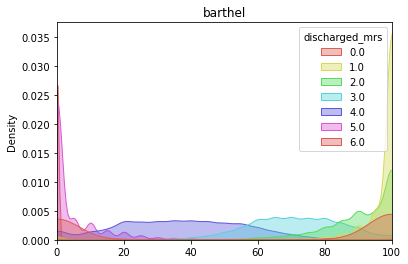

In [9]:
sns.kdeplot(barthel,hue = discharged_mrs,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.rcParams['figure.figsize'] = (10,5)
#plt.legend(loc=1)
plt.savefig("barthel_all.png")
plt.show()

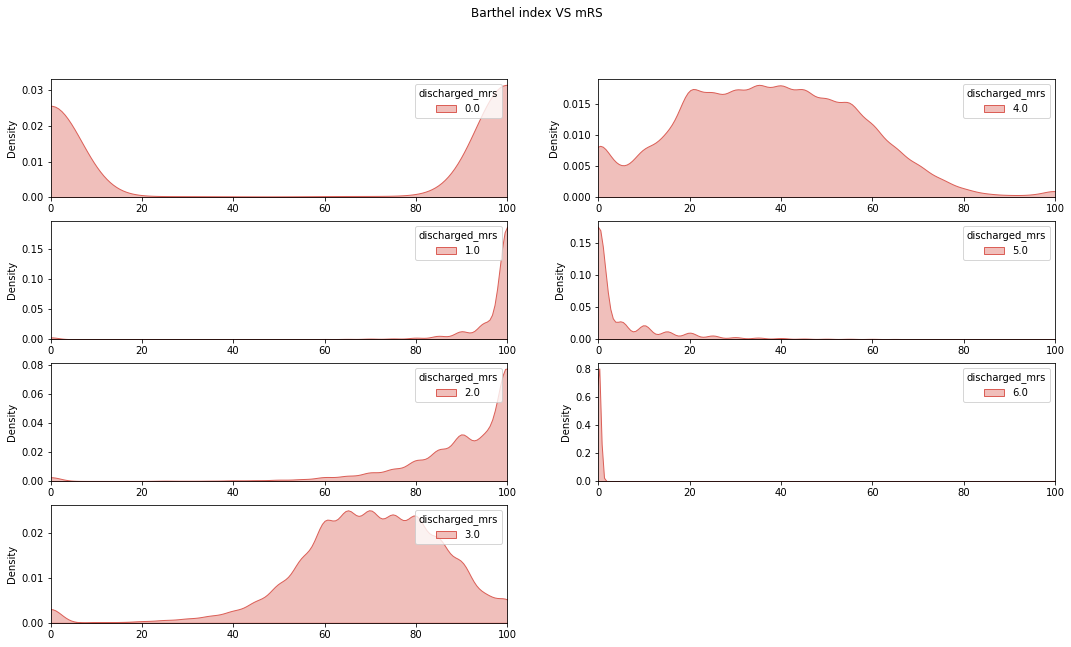

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(18, 10))
fig.suptitle('Barthel index VS mRS')

sns.kdeplot(ax=axes[0, 0], x = barthel,hue = discharged_mrs_0,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[1, 0], x = barthel,hue = discharged_mrs_1,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[2, 0], x = barthel,hue = discharged_mrs_2,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[3, 0], x = barthel,hue = discharged_mrs_3,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[0, 1], x = barthel,hue = discharged_mrs_4,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[1, 1], x = barthel,hue = discharged_mrs_5,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[2, 1], x = barthel,hue = discharged_mrs_6,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
fig.delaxes(axes[3,1])
axes[0,0].set_xlim([0, 100])
axes[1,0].set_xlim([0, 100])
axes[2,0].set_xlim([0, 100])
axes[3,0].set_xlim([0, 100])
axes[0,1].set_xlim([0, 100])
axes[1,1].set_xlim([0, 100])
axes[2,1].set_xlim([0, 100])
plt.savefig("barthel_all_subplot.png")
plt.show()

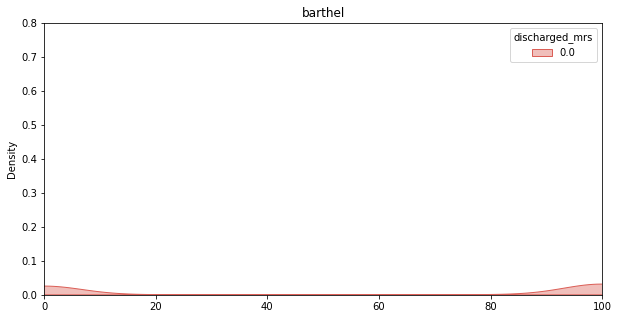

In [11]:
sns.kdeplot(barthel,hue = discharged_mrs_0,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.ylim(0,0.8)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("barthel_all_0.png")
plt.show()

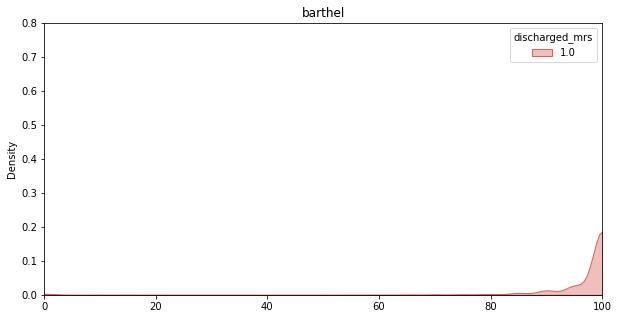

In [12]:
sns.kdeplot(barthel,hue = discharged_mrs_1,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.ylim(0,0.8)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("barthel_all_1.png")
plt.show()

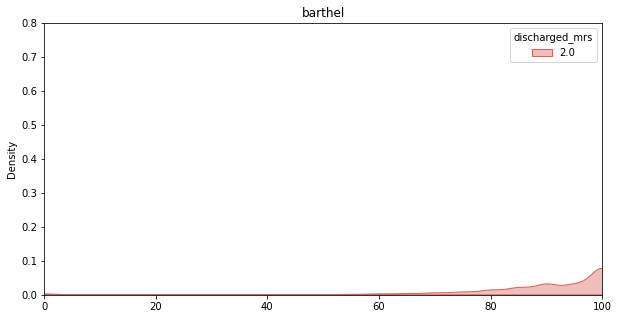

In [13]:
sns.kdeplot(barthel,hue = discharged_mrs_2,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.ylim(0,0.8)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("barthel_all_2.png")
plt.show()

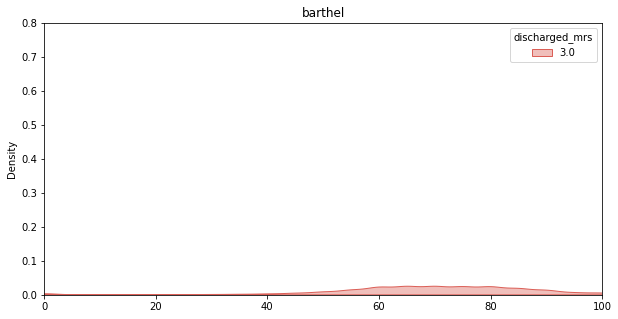

In [14]:
sns.kdeplot(barthel,hue = discharged_mrs_3,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.ylim(0,0.8)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("barthel_all_3.png")
plt.show()

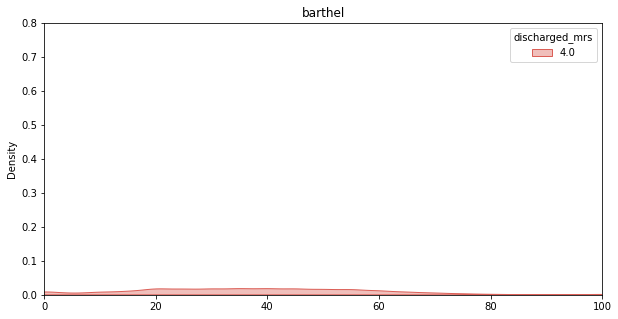

In [15]:
sns.kdeplot(barthel,hue = discharged_mrs_4,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.ylim(0,0.8)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("barthel_all_4.png")
plt.show()

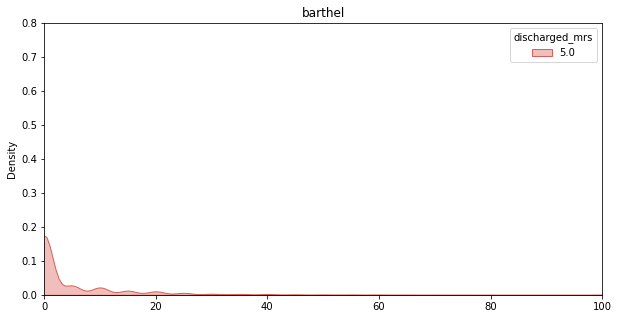

In [16]:
sns.kdeplot(barthel,hue = discharged_mrs_5,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.ylim(0,0.8)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("barthel_all_5.png")
plt.show()

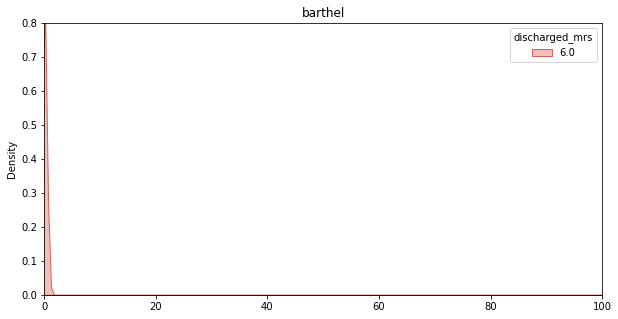

In [17]:
sns.kdeplot(barthel,hue = discharged_mrs_6,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("barthel")
plt.xlim(0,100)
plt.ylim(0,0.8)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("barthel_all_6.png")
plt.show()

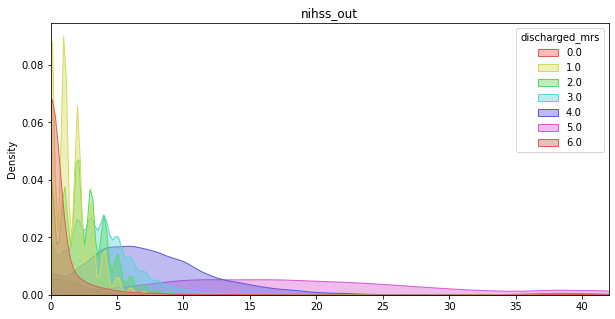

In [18]:
sns.kdeplot(nihss_out,hue = discharged_mrs,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all.png")
plt.show()

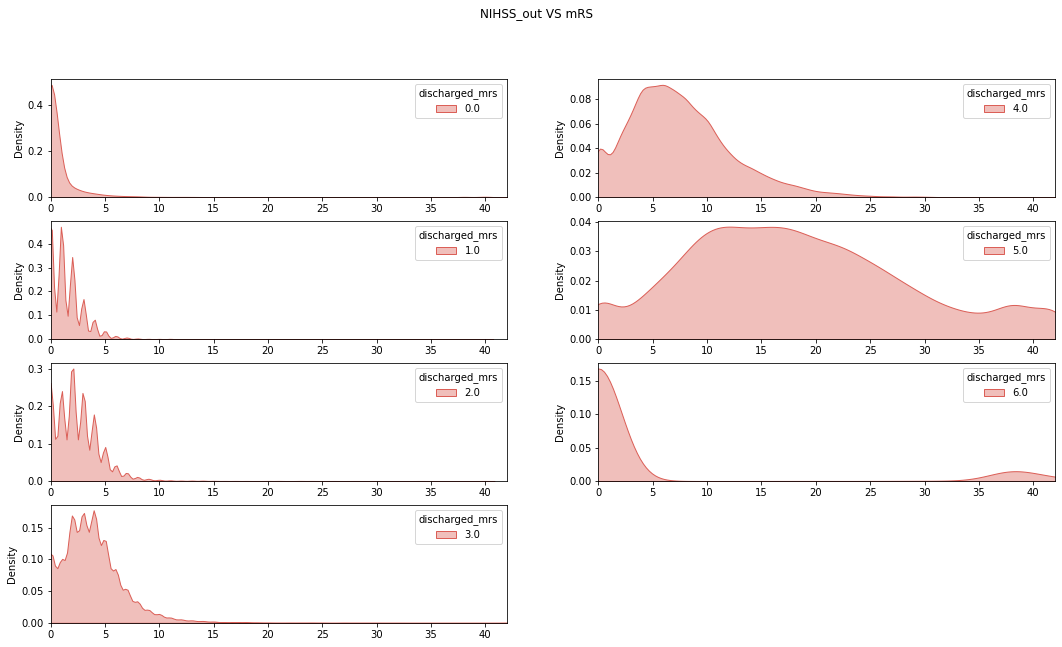

In [19]:
fig, axes = plt.subplots(4, 2, figsize=(18, 10))
fig.suptitle('NIHSS_out VS mRS')

sns.kdeplot(ax=axes[0, 0], x = nihss_out,hue = discharged_mrs_0,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[1, 0], x = nihss_out,hue = discharged_mrs_1,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[2, 0], x = nihss_out,hue = discharged_mrs_2,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[3, 0], x = nihss_out,hue = discharged_mrs_3,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[0, 1], x = nihss_out,hue = discharged_mrs_4,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[1, 1], x = nihss_out,hue = discharged_mrs_5,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
sns.kdeplot(ax=axes[2, 1], x = nihss_out,hue = discharged_mrs_6,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
fig.delaxes(axes[3,1])
axes[0,0].set_xlim([0, 42])
axes[1,0].set_xlim([0, 42])
axes[2,0].set_xlim([0, 42])
axes[3,0].set_xlim([0, 42])
axes[0,1].set_xlim([0, 42])
axes[1,1].set_xlim([0, 42])
axes[2,1].set_xlim([0, 42])
plt.savefig("NIHSS_out_all_subplot.png")
plt.show()

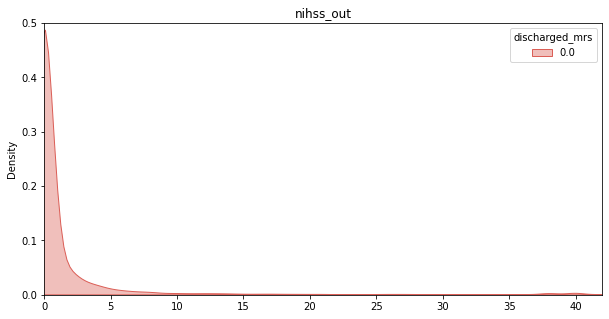

In [20]:
sns.kdeplot(nihss_out,hue = discharged_mrs_0,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.ylim(0,0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all_0.png")
plt.show()

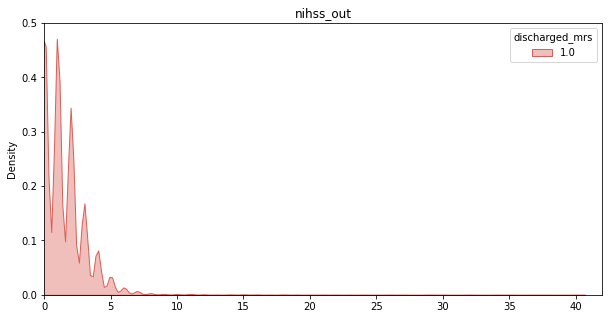

In [21]:
sns.kdeplot(nihss_out,hue = discharged_mrs_1,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.ylim(0,0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all_1.png")
plt.show()

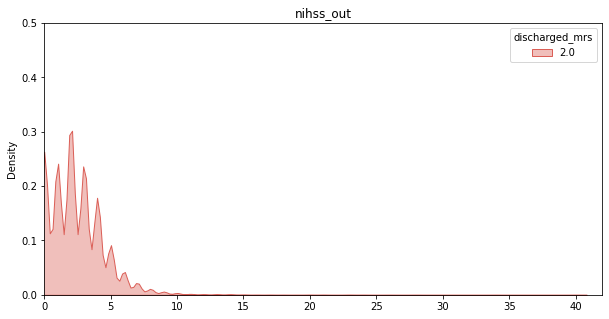

In [22]:
sns.kdeplot(nihss_out,hue = discharged_mrs_2,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.ylim(0,0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all_2.png")
plt.show()

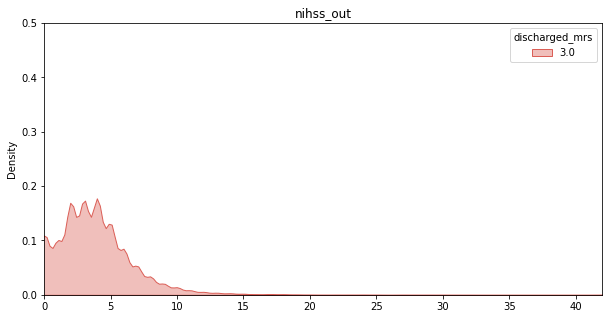

In [23]:
sns.kdeplot(nihss_out,hue = discharged_mrs_3,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.ylim(0,0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all_3.png")
plt.show()

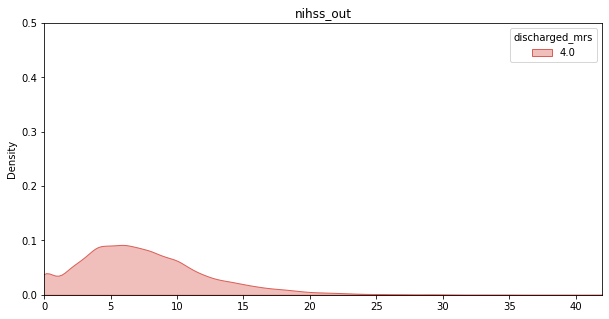

In [24]:
sns.kdeplot(nihss_out,hue = discharged_mrs_4,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.ylim(0,0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all_4.png")
plt.show()

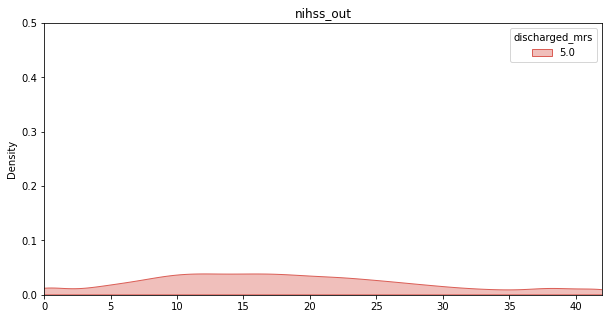

In [25]:
sns.kdeplot(nihss_out,hue = discharged_mrs_5,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.ylim(0,0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all_5.png")
plt.show()

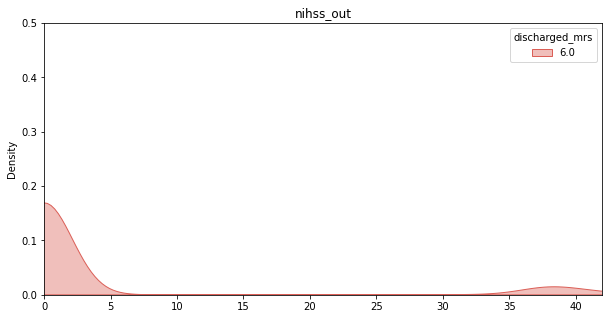

In [26]:
sns.kdeplot(nihss_out,hue = discharged_mrs_6,vertical=False, fill=True, alpha = 0.4, palette="hls", linewidth=1)
plt.title("nihss_out")
plt.xlim(0,42)
plt.ylim(0,0.5)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig("nihss_out_all_6.png")
plt.show()